### Demension Reduction & Clustering

PCA -> KNN Clustering -> DBSCAN Clustering -> Hierarchical Clustering + AutoEncoder

Exercise : KOSPI Clustering / Intro. Allocation 

#### 1. Principal Component Analysis

statsmodels -> sklearn 소개하고 auto encoder 소개할것

In [42]:
import numpy as np
import pandas as pd

stock_list = pd.read_csv('selected_tickers_info.csv', index_col = 0)
stock_list

,Name,Sector
Symbol,,
ARE,Alexandria Real Estate Equities Inc,Real Estate
ALLE,Allegion,Industrials
AGN,"Allergan, Plc",Health Care
ALL,Allstate Corp,Financials
AME,AMETEK Inc.,Industrials
AIV,Apartment Investment & Management,Real Estate
ADM,Archer-Daniels-Midland Co,Consumer Staples
T,AT&T Inc.,Telecommunication Services
CHRW,C. H. Robinson Worldwide,Industrials


In [76]:
import yfinance as yf
import pandas as pd

stock_data = pd.DataFrame()
for ticker in stock_list.index :
    stock = yf.Ticker(ticker)
    data = stock.history(start = "2022-01-01", end = "2023-11-19")
    stock_data[ticker] = data["Close"]
stock_data.head()

AGN: No timezone found, symbol may be delisted
CTL: No timezone found, symbol may be delisted
DISCK: No timezone found, symbol may be delisted
RE: No timezone found, symbol may be delisted
FLIR: No timezone found, symbol may be delisted
PKI: No timezone found, symbol may be delisted


,ARE,ALLE,AGN,ALL,AME,AIV,ADM,T,CHRW,CTL,...,PRGO,PM,SPGI,SWKS,SLG,SNA,SO,SYF,TPR,VZ
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03 00:00:00-05:00,206.132553,126.245667,NaN,112.490311,141.971268,7.743167,65.118027,16.749739,103.622444,NaN,...,37.274570,87.197845,453.564667,153.461182,65.553726,203.878403,62.999428,44.516781,38.623112,46.316528
2022-01-04 00:00:00-05:00,207.060883,129.212479,NaN,115.210556,144.362656,7.693275,66.326569,16.888058,106.004135,NaN,...,38.080967,87.753471,452.305573,154.873062,68.273102,211.113327,62.999428,45.615494,39.418102,47.226257
2022-01-05 00:00:00-05:00,193.773773,126.196877,NaN,115.105919,141.734116,7.453796,65.808609,17.263496,105.312675,NaN,...,37.938663,87.398232,448.311920,151.828430,67.870895,209.431259,63.073387,44.431534,39.067924,47.712032
2022-01-06 00:00:00-05:00,196.764999,124.986725,NaN,116.418488,143.433777,7.274187,66.393707,17.197632,106.551521,NaN,...,38.185326,88.728104,444.574036,151.886032,69.619682,210.014236,62.999428,45.047195,39.228821,47.482391
2022-01-07 00:00:00-05:00,195.977371,123.581398,NaN,119.795006,140.696548,7.254230,66.959610,17.785156,104.131432,NaN,...,38.631218,90.303909,439.449127,148.111450,69.908234,209.345200,63.433800,45.662853,37.231888,48.483528


In [77]:
stock_data.dropna(axis = 1, inplace = True)
ret_stock = np.log(stock_data / stock_data.shift(1)).dropna()
ret_stock.head()

,ARE,ALLE,ALL,AME,AIV,ADM,T,CHRW,GLW,COST,...,PRGO,PM,SPGI,SWKS,SLG,SNA,SO,SYF,TPR,VZ
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-04 00:00:00-05:00,0.004493,0.023228,0.023894,0.016704,-0.006464,0.018389,0.008224,0.022724,0.021809,-0.004386,...,0.021403,0.006352,-0.002780,0.009158,0.040646,0.034871,0.000000,0.024381,0.020374,0.019451
2022-01-05 00:00:00-05:00,-0.066322,-0.023615,-0.000909,-0.018376,-0.031623,-0.007840,0.021988,-0.006544,0.004463,-0.025689,...,-0.003744,-0.004056,-0.008869,-0.019855,-0.005909,-0.008000,0.001173,-0.026298,-0.008923,0.010234
2022-01-06 00:00:00-05:00,0.015319,-0.009636,0.011339,0.011921,-0.024391,0.008852,-0.003823,0.011695,0.003921,-0.000218,...,0.006481,0.015102,-0.008373,0.000379,0.025440,0.002780,-0.001173,0.013761,0.004110,-0.004825
2022-01-07 00:00:00-05:00,-0.004011,-0.011307,0.028591,-0.019268,-0.002747,0.008487,0.033593,-0.022975,-0.009437,-0.025085,...,0.011609,0.017604,-0.011595,-0.025165,0.004136,-0.003191,0.006871,0.013574,-0.052246,0.020865
2022-01-10 00:00:00-05:00,-0.005662,-0.012236,-0.019320,-0.015216,-0.012457,0.001718,0.006445,-0.005456,-0.009792,-0.032951,...,0.019456,0.011433,-0.025757,-0.000778,-0.009047,-0.006182,-0.001604,0.001865,-0.047901,-0.006845


/var/folders/1q/pl9tj55n57s9jg28npxw61n80000gn/T/ipykernel_73629/1873993828.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


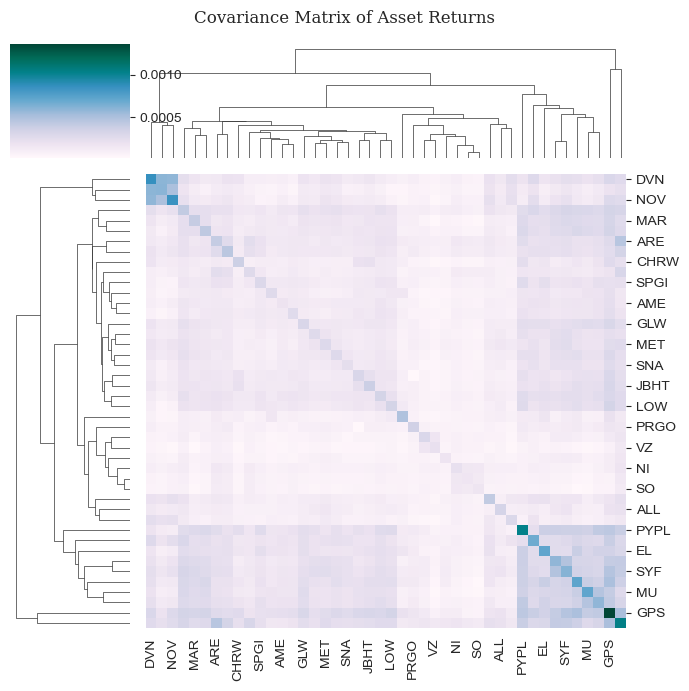

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

covariance = ret_stock.cov()
g = sns.clustermap(covariance, figsize = (7,7), cmap = 'PuBuGn')
g.fig.suptitle('Covariance Matrix of Asset Returns', fontsize = 12, fontfamily = 'Serif')
plt.tight_layout()
plt.show()

In [79]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

correlation = ret_stock.corr()
distances = np.sqrt((1 - correlation) / 2)
clusters = linkage(squareform(distances), method="single")

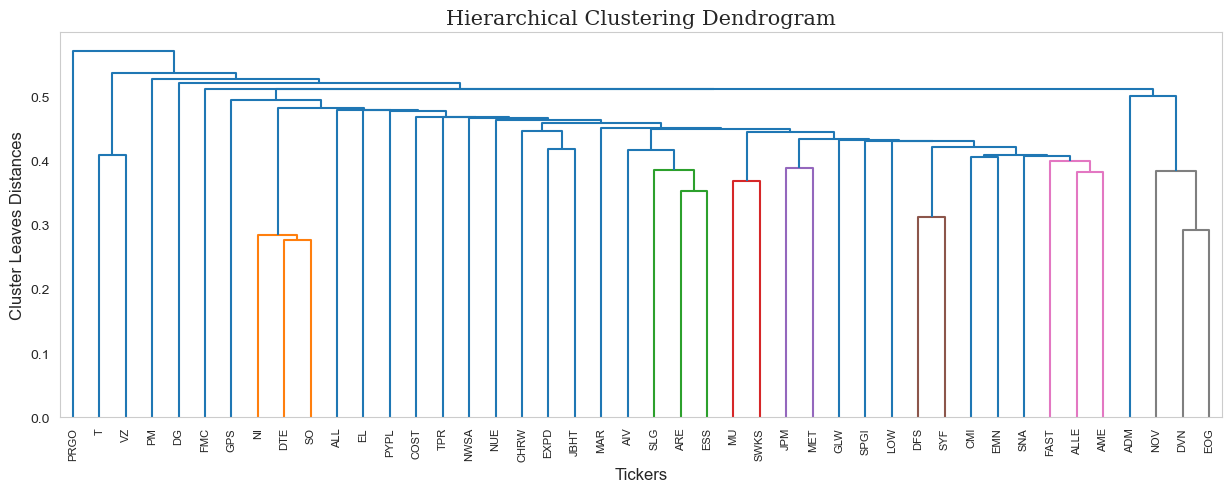

In [80]:
columns = ret_stock.columns
plt.figure(figsize=(15, 5))
dendrogram(clusters, labels=columns)
plt.xlabel('Tickers', fontsize=12)
plt.ylabel('Cluster Leaves Distances', fontsize=12)
plt.grid(False)
plt.title('Hierarchical Clustering Dendrogram', fontsize = 15, fontfamily = 'Serif')
plt.show()

In [81]:
import statsmodels.api as sm

pca_model = sm.PCA(ret_stock, 
                   standardize = True, 
                   demean = True,
                   ncomp = 5)

In [82]:
print("Principal Ratio : ", pca_model.factors.shape)
print("R Square score : ", pca_model.rsquare)

Principal Ratio :  (472, 5)
R Square score :  ncomp
0    0.000000
1    0.397211
2    0.466759
3    0.524217
4    0.561848
5    0.590477
Name: rsquare, dtype: float64


In [83]:
pc_scores = pca_model.factors
pc_scores.head()

,comp_0,comp_1,comp_2,comp_3,comp_4
Date,,,,,
2022-01-04 00:00:00-05:00,-0.058433,0.000436,0.079050,-0.041485,0.028663
2022-01-05 00:00:00-05:00,0.043900,-0.025449,0.011518,-0.044395,0.023510
2022-01-06 00:00:00-05:00,-0.020686,0.010334,0.034591,-0.026610,-0.002853
2022-01-07 00:00:00-05:00,0.007016,-0.072171,0.070364,-0.122179,0.013699
2022-01-10 00:00:00-05:00,0.036038,-0.040556,0.027662,-0.061261,-0.020504


In [84]:
ret_stock.head()

,ARE,ALLE,ALL,AME,AIV,ADM,T,CHRW,GLW,COST,...,PRGO,PM,SPGI,SWKS,SLG,SNA,SO,SYF,TPR,VZ
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-04 00:00:00-05:00,0.004493,0.023228,0.023894,0.016704,-0.006464,0.018389,0.008224,0.022724,0.021809,-0.004386,...,0.021403,0.006352,-0.002780,0.009158,0.040646,0.034871,0.000000,0.024381,0.020374,0.019451
2022-01-05 00:00:00-05:00,-0.066322,-0.023615,-0.000909,-0.018376,-0.031623,-0.007840,0.021988,-0.006544,0.004463,-0.025689,...,-0.003744,-0.004056,-0.008869,-0.019855,-0.005909,-0.008000,0.001173,-0.026298,-0.008923,0.010234
2022-01-06 00:00:00-05:00,0.015319,-0.009636,0.011339,0.011921,-0.024391,0.008852,-0.003823,0.011695,0.003921,-0.000218,...,0.006481,0.015102,-0.008373,0.000379,0.025440,0.002780,-0.001173,0.013761,0.004110,-0.004825
2022-01-07 00:00:00-05:00,-0.004011,-0.011307,0.028591,-0.019268,-0.002747,0.008487,0.033593,-0.022975,-0.009437,-0.025085,...,0.011609,0.017604,-0.011595,-0.025165,0.004136,-0.003191,0.006871,0.013574,-0.052246,0.020865
2022-01-10 00:00:00-05:00,-0.005662,-0.012236,-0.019320,-0.015216,-0.012457,0.001718,0.006445,-0.005456,-0.009792,-0.032951,...,0.019456,0.011433,-0.025757,-0.000778,-0.009047,-0.006182,-0.001604,0.001865,-0.047901,-0.006845


<Axes: >

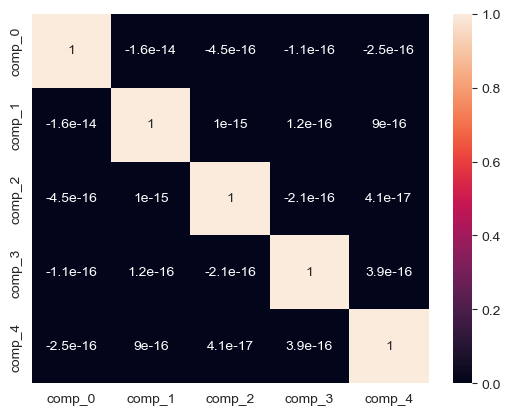

In [85]:
sns.heatmap(pc_scores.corr(), annot = True)

<Axes: >

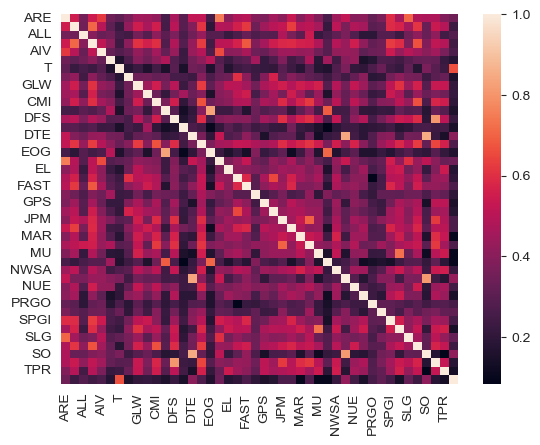

In [86]:
sns.heatmap(ret_stock.corr())

In [122]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 5)
pca.fit(ret_stock)

PCA(n_components=5)

In [123]:
pc_scores = pca.transform(ret_stock)
print("주성분:")
print(pca.components_)
print("설명된 분산 비율:")
print(pca.explained_variance_ratio_)

주성분:
[[ 1.58977091e-01  1.51897004e-01  1.01677666e-01  1.17041764e-01
   1.53411254e-01  9.39924847e-02  7.43397648e-02  1.17606587e-01
   1.45954640e-01  1.09542987e-01  1.37474536e-01  1.70844526e-01
   1.98147224e-01  8.93894163e-02  6.59786758e-02  1.81876985e-01
   1.24299605e-01  1.16722000e-01  1.90130750e-01  1.33983612e-01
   1.18658407e-01  1.18220428e-01  2.78156702e-01  1.42673711e-01
   1.30026930e-01  1.43504088e-01  1.57066177e-01  1.36157809e-01
   1.96346016e-01  1.48448830e-01  1.59201652e-01  7.94458770e-02
   1.89941047e-01  2.20794026e-01  8.63793879e-02  7.06207507e-02
   1.28596672e-01  2.02292758e-01  2.46425581e-01  1.26101741e-01
   6.00721125e-02  2.10636554e-01  2.13376291e-01  5.50658401e-02]
 [-1.73725174e-02 -7.23598902e-02  6.75760098e-02 -3.11134669e-02
   2.33862479e-02  1.79655963e-01  1.58077390e-02  5.55605069e-03
  -1.88560750e-02 -5.83616922e-02  1.10232294e-02  5.13716472e-01
  -5.87926059e-02 -3.24133872e-02  3.55985526e-02  1.96871955e-02
   4

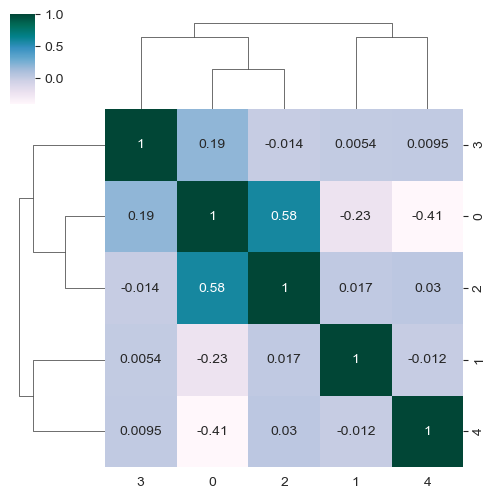

In [124]:
sns.clustermap(np.corrcoef(pca.components_), annot = True, figsize = (5,5), cmap = 'PuBuGn')

/var/folders/1q/pl9tj55n57s9jg28npxw61n80000gn/T/ipykernel_73629/3755362694.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


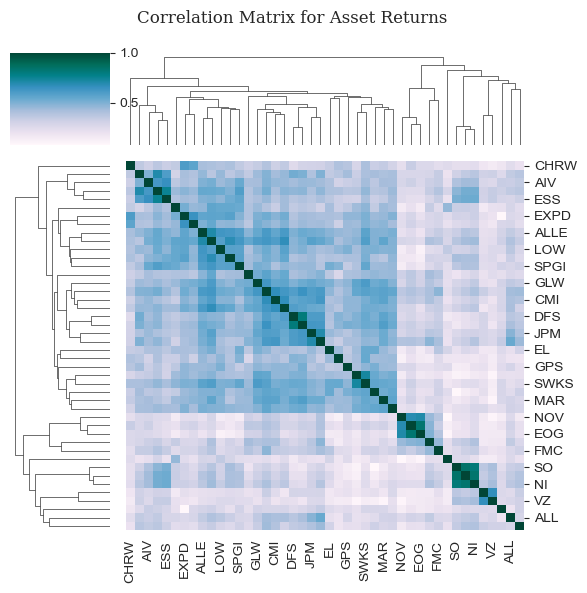

In [125]:
g = sns.clustermap(correlation, figsize = (6, 6), cmap = 'PuBuGn')
g.fig.suptitle('Correlation Matrix for Asset Returns', fontsize=12, fontfamily='Serif')
plt.tight_layout()
plt.show()

#### 2. K-mean Clustering

In [134]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

cov_matrix = ret_stock.cov()

n_clusters = 3
kmeans = KMeans(n_clusters = n_clusters, random_state = 42)
kmeans.fit(cov_matrix)

labels = kmeans.labels_

/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'Mean-variance Clustering')

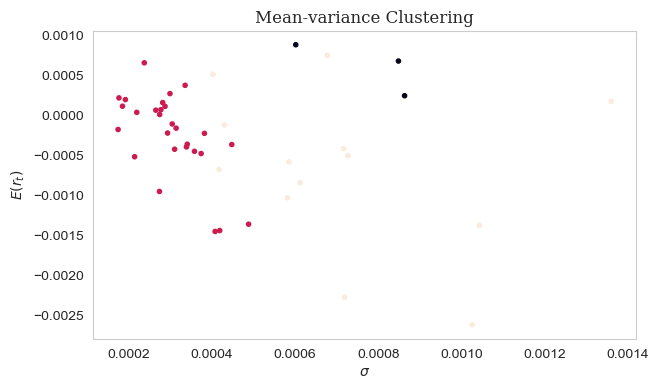

In [161]:
plt.figure(figsize = (7,4))
plt.scatter(ret_stock.var(axis = 0), ret_stock.mean(axis = 0), c = labels, marker = '.')
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$E(r_t)$')
plt.grid(False)
plt.title('Mean-variance Clustering', fontsize = 12, fontfamily = 'Serif')

#### 3. DBSCAN

In [159]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

cov_matrix = ret_stock.cov()

dbscan = DBSCAN(eps = 0.0003, min_samples = 2)
clusters = dbscan.fit_predict(cov_matrix)

Text(0.5, 1.0, 'Mean-variance Clustering')

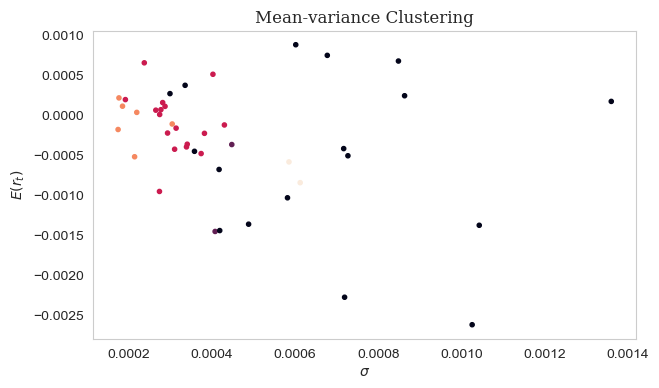

In [162]:
plt.figure(figsize = (7,4))
plt.scatter(ret_stock.var(axis = 0), ret_stock.mean(axis = 0), c = clusters, marker = '.')
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$E(r_t)$')
plt.grid(False)
plt.title('Mean-variance Clustering', fontsize = 12, fontfamily = 'Serif')

#### 4. Hierarchical Clustering